/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_11329/2761879129.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


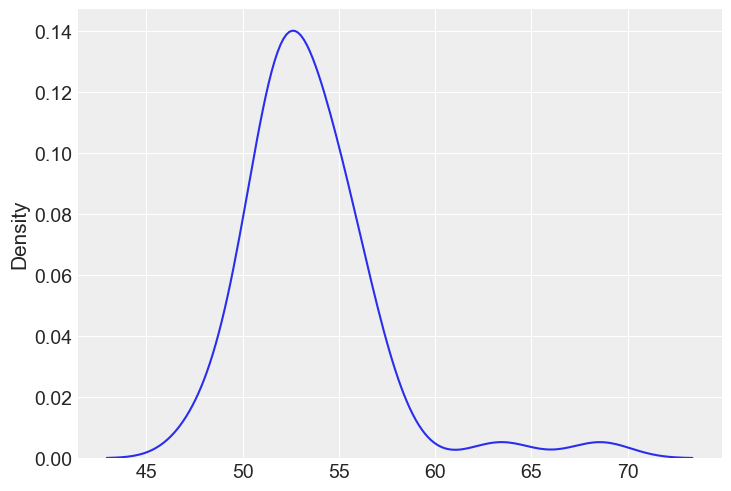

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc as pm
import arviz as az
import pandas as pd 
plt.style.use("seaborn-darkgrid")
np.set_printoptions(precision=2)
az.style.use("arviz-darkgrid")
pd.set_option("display.precision", 2)
rng = np.random.default_rng(42)

data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 
    55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 
    57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94,
    54.95, 50.39, 52.91, 51.50, 52.68, 47.72, 49.73, 51.82, 54.99, 52.84,
    53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.30, 53.84, 53.16
])

sns.kdeplot(data)
plt.savefig("img302.png")

Sampling: [mu, sigma, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_100 draw iterations (4_000 + 4_400 draws total) took 1 seconds.


array([[<AxesSubplot: title={'center': 'mu'}>,
        <AxesSubplot: title={'center': 'mu'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

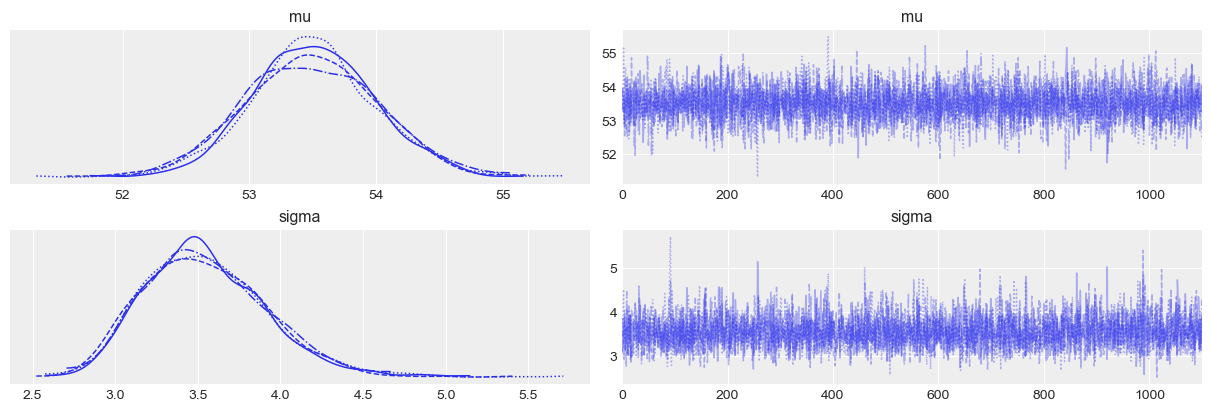

In [59]:
with pm.Model() as model_g:
    mu = pm.Uniform("mu", 40, 75)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    idata = pm.sample_prior_predictive(samples=100, random_seed=rng)

    # step = pm.Slice()
    trace_g = pm.sample(1100)
    # chain_g = trace_g[100:]

# chain_g = trace_g[1]
# pm.traceplot(chain_g)
az.plot_trace(trace_g)

array([<AxesSubplot: title={'center': 'mu'}>,
       <AxesSubplot: title={'center': 'sigma'}>], dtype=object)

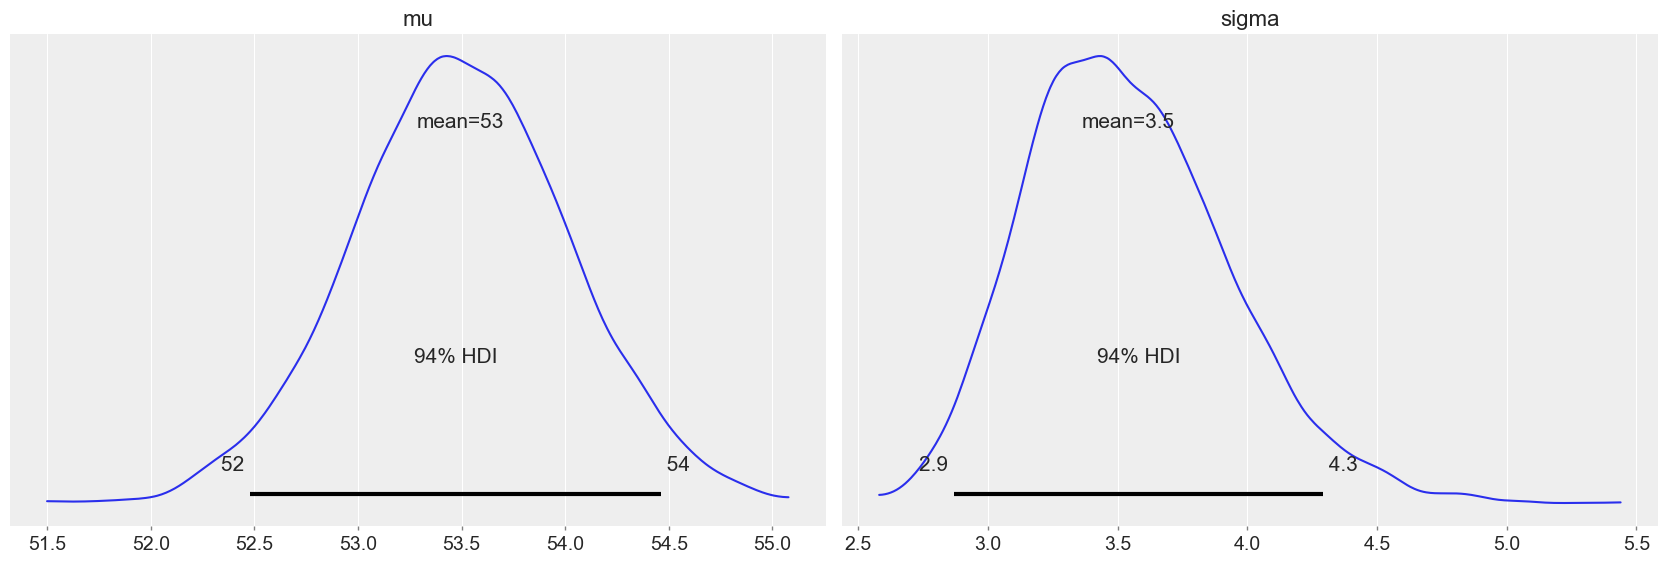

In [24]:
az.plot_posterior(trace_g)

array([<AxesSubplot: title={'center': '94.0% HDI'}>,
       <AxesSubplot: title={'center': 'r_hat'}>], dtype=object)

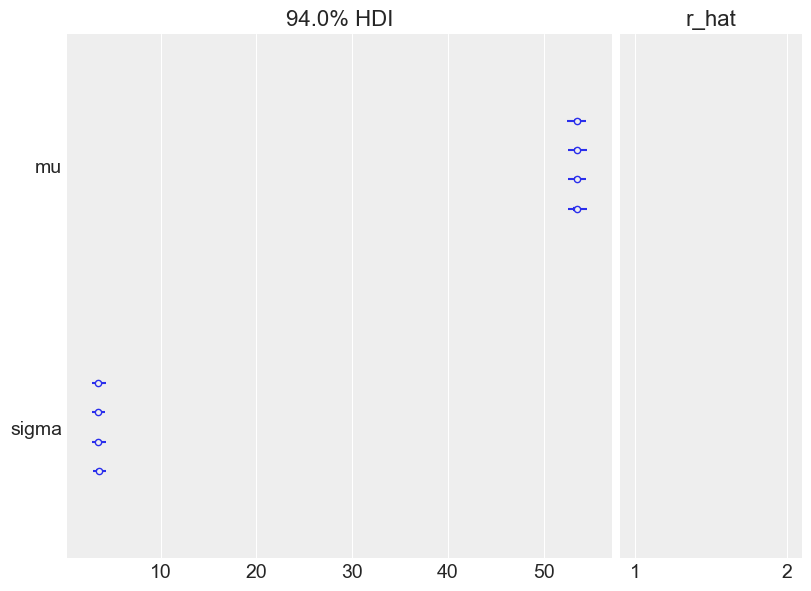

In [26]:
az.plot_forest(trace_g, r_hat=True)

In [7]:
df = pm.summary(trace_g)
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.49,0.52,52.48,54.46,9.00e-03,6.00e-03,3340.0,2824.0,1.0
sigma,3.54,0.39,2.87,4.29,6.00e-03,4.00e-03,4112.0,3158.0,1.0


In [8]:
az.summary(trace_g)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.49,0.52,52.48,54.46,9.00e-03,6.00e-03,3340.0,2824.0,1.0
sigma,3.54,0.39,2.87,4.29,6.00e-03,4.00e-03,4112.0,3158.0,1.0


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 0 seconds.


array([[<AxesSubplot: title={'center': 'mu'}>,
        <AxesSubplot: title={'center': 'mu'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

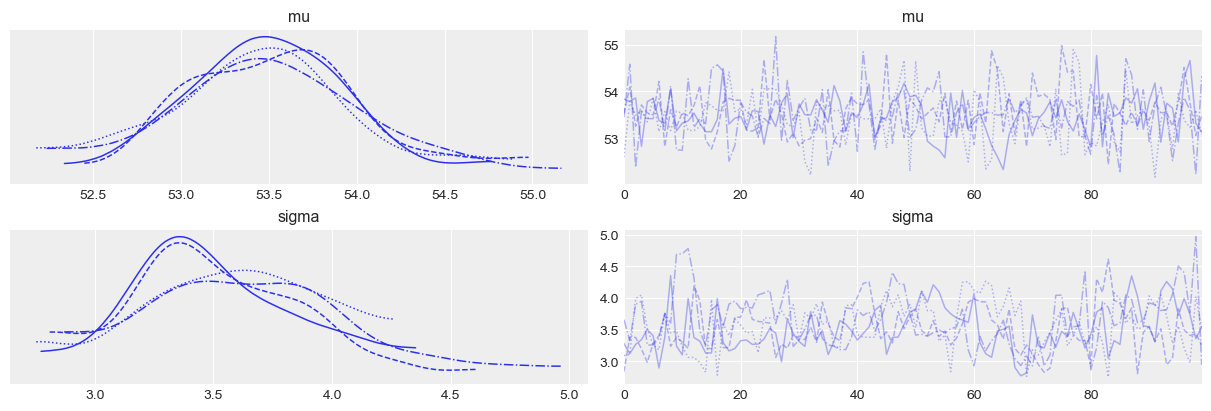

In [61]:
with model_g:
    idata.extend(pm.sample(100, tune=100, random_seed=rng))

az.plot_trace(idata)

In [63]:
with model_g:
    pm.sample_posterior_predictive(idata, extend_inferencedata=True,
        random_seed=rng,
        var_names=["mu", "sigma"],
        )
# az.plot_ppc(az.from_pymc3(posterior_predictive=y_pred, model=model_g))
# print(y_pred["posterior_predictive"]["mu"].shape)
# print(y_pred.keys())

Sampling: [mu, sigma]


In [64]:
idata.posterior_predictive

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 100, y_dim_2: 48)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * y_dim_2  (y_dim_2) int64 0 1 2 3 4 5 6 7 8 9 ... 39 40 41 42 43 44 45 46 47
Data variables:
    y        (chain, draw, y_dim_2) float64 54.06 58.71 53.69 ... 54.0 53.98
Attributes:
    created_at:                 2022-12-03T07:10:46.098024
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  4.4.0

array([<AxesSubplot: xlabel='y / y', ylabel='Density'>], dtype=object)

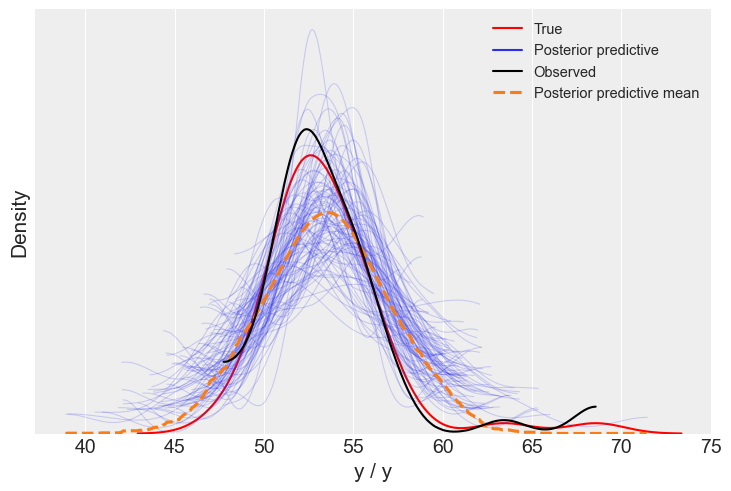

In [73]:
fig, ax = plt.subplots()
sns.kdeplot(data, c="r", ax=ax, label="True")
az.plot_ppc(idata, num_pp_samples=100, ax=ax)